In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df_portfolio=pd.read_csv("portfolio.csv")
df_portfolio.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [3]:
df_profile=pd.read_csv("profile.csv")
df_profile.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
df_transcript=pd.read_csv("transcript.csv")
df_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


# DATA WRANGLING

#Data Cleaning

#dropping unuseful columns

In [5]:
df_portfolio = df_portfolio.drop(columns=['Unnamed: 0']).dropna(axis=1)
df_portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [6]:
df_profile = df_profile.drop('Unnamed: 0', axis = 1)
df_profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [7]:
df_transcript= df_transcript.drop('Unnamed: 0', axis = 1)
df_transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

#there are 2175 missing values from both gender column and income column in profile dataframe. so, let us check whether these
missing values are from the same observations

In [8]:
missing_gender = df_profile[df_profile['gender'].isna()]
missing_income = df_profile[df_profile['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])

2175

In [9]:
##Income plays a major role in customer behavior, so observations with missing income are removed.

df_profile_new = df_profile.drop(df_profile[df_profile['id'].isin(missing_income['id'])].index).reset_index(drop=True)
print(df_profile_new.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB
None


#Data Transformation

In [10]:
#adding an alias (samlpe name) for identifying offers easily

# Sort df offers
df_portfolio = df_portfolio.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Add column `offer_Sname`
from string import ascii_uppercase
df_portfolio['offer_Sname'] = [ascii_uppercase[i] for i in range(df_portfolio.shape[0])]
df_portfolio


,reward,channels,difficulty,duration,offer_type,id,offer_Sname
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


In [13]:
# Elements in value_columns are strings. let me Convert them to dictionaries for easier manipulation

# Elements in value_columns are strings. Convert them to dictionaries
value_column = df_transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

# Extract the keys
dictionary_key_column = [list(d.keys())[0] for d in value_column]
# Extract the values
dictionary_value_column = [list(d.values())[0] for d in value_column]

# Create a df containing the keys and values of the dictionary elements of `value_column`
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(5)


,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5
3,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0


In [14]:
# Replacing `value` column with new split columns and then reordering the columns
df_transcript_new = df_transcript.drop('value', axis = 1)
df_transcript_new = pd.concat([df_transcript_new, value_column_split], axis = 1)
# Display the resulting DataFrame
df_transcript_new.columns.values


array(['person', 'event', 'time', 'dict_key', 'dict_value'], dtype=object)

In [15]:
column_names = ['person', 'event', 'dict_key', 'dict_value', 'time']
df_transcript_new = df_transcript_new[column_names]
df_transcript_new.sample(5)

,person,event,dict_key,dict_value,time
165828,c194b5ce7f674e8bb65b14b914c97904,offer viewed,offer id,2298d6c36e964ae4a3e7e9706d1fb8c2,408
143436,59393ca60d444709b6051c43c98fb66e,transaction,amount,3.29,378
214988,860bff95cb66440e864321194558bc89,offer viewed,offer id,f19421c1d4aa40978ebb69ca19b0e20d,504
128127,2193267a91d747dfa7197bb39c78b2e5,offer completed,offer_id,fafdcd668e3743c1bb461111dcafc2a4,342
234412,f34239eebcc043d5afdf7823dd7cbcdc,transaction,amount,7.73,540


# Explorary Data Analtsis 

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


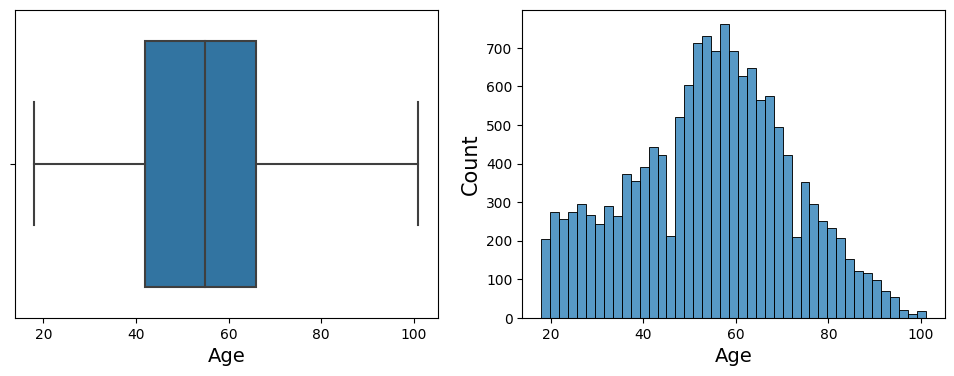

In [16]:
#EDA ON CUSTOMER PROFILE DATA

customers = df_profile_new.copy()

# Using seaborn's boxplot and histplot functions separately
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(x='age', data=customers, ax=axs[0])
sns.histplot(x='age', data=customers, ax=axs[1])

# Setting label sizes
for ax in axs:
    ax.set_xlabel('Age', fontsize=14)
    ax.set_ylabel('Count' if ax == axs[1] else '', fontsize=15)

# Displaying the descriptive statistics
print(customers['age'].describe())

plt.show()


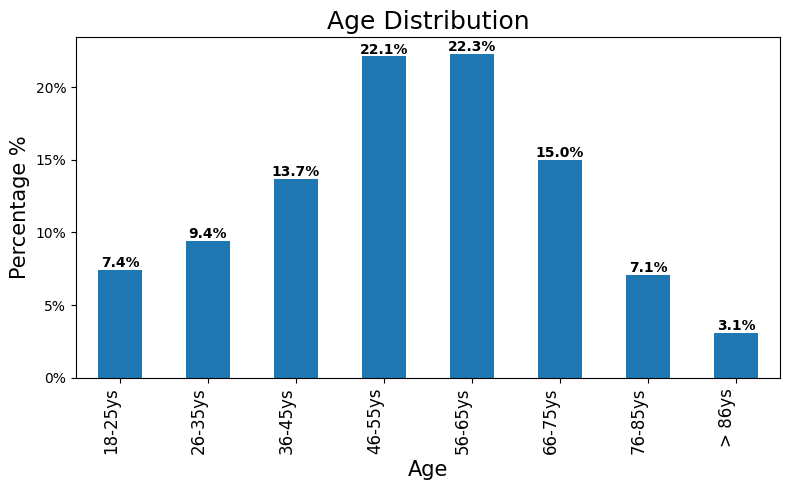

In [17]:
# Create a new column `age_group`

customers = df_profile_new.copy()

# Create a new column `age_group` using pd.cut
bins = [customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()]
labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']
customers['age_group'] = pd.cut(customers['age'], bins=bins, labels=labels)

# Visualize customers by age groups
age_group_percentage = (customers['age_group'].value_counts(normalize=True).sort_index() * 100).round(1)
fig, ax = plt.subplots(figsize=(8, 5))

yticks = np.arange(0, 25, 5)
yticklabels = [str(y) + '%' for y in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# Set exact positions for the ticks and their labels
xtick_positions = np.arange(len(labels))
ax.set_xticks(xtick_positions)
ax.set_xticklabels(labels, rotation=45, fontsize=12, ha='right')

ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Percentage %', fontsize=15)
ax.set_title('Age Distribution', fontsize=18)

bar_plot = age_group_percentage.plot(kind='bar', ax=ax)
for i, bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    ax.text(x + bar.get_width() / 2, y + bar.get_height() + 0.2,
            str(age_group_percentage.iloc[i]) + '%',
            ha='center', weight='bold')

plt.tight_layout()
plt.show()



count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


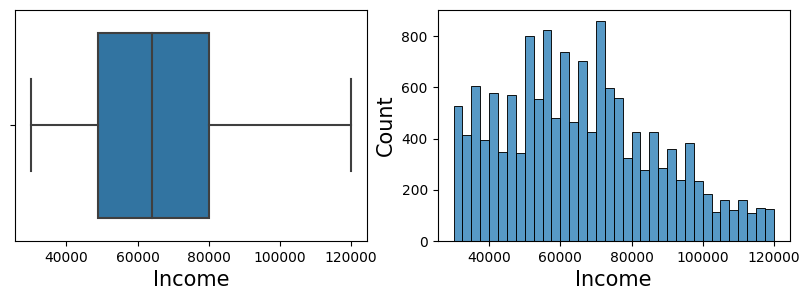

In [18]:

customers = df_profile_new.copy()

# Using seaborn's boxplot and histplot functions separately
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Boxplot
sns.boxplot(x='income', data=customers, ax=axs[0])

# Histplot
sns.histplot(x='income', data=customers, ax=axs[1])

# Setting label sizes
for ax in axs:
    ax.set_xlabel('Income', fontsize=15)
    ax.set_ylabel('Count' if ax == axs[1] else '', fontsize=15)

# Displaying the descriptive statistics
print(customers['income'].describe())

plt.show()


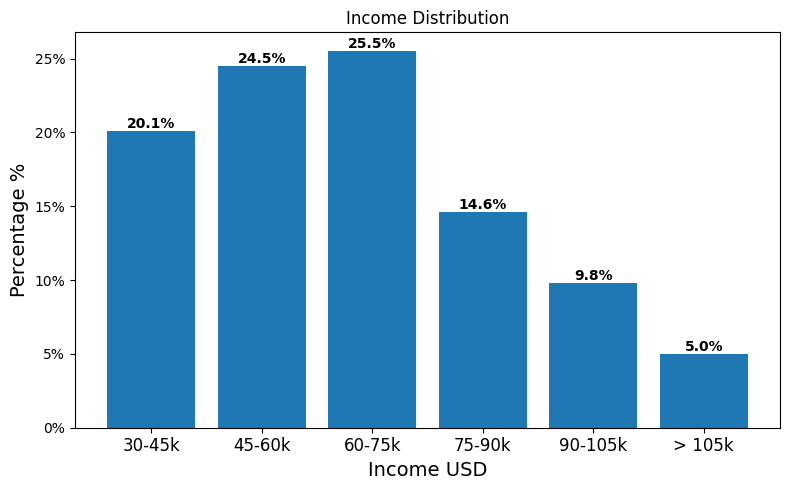

In [19]:
# Create a new column `income_group`
income_group = pd.cut(customers['income'],
      bins = [customers['income'].min(), 45000, 60000, 75000, 90000, 105000, customers['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
customers['income_group'] = income_group

# Visualize customers by income groups
income_group_percentage = (customers.value_counts('income_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,30,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels, fontsize = 10)
plt.xticks(fontsize = 12)
plt.xlabel('Income USD', fontsize = 14)
plt.ylabel('Percentage %', fontsize = 14)
plt.title('Income Distribution')

bar_plot = plt.bar(x = income_group_percentage.index.values, height = income_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold', fontsize = 10)

plt.tight_layout()
plt.show()


  gender        income
0      F  71306.412139
1      M  61194.601603
2      O  63287.735849


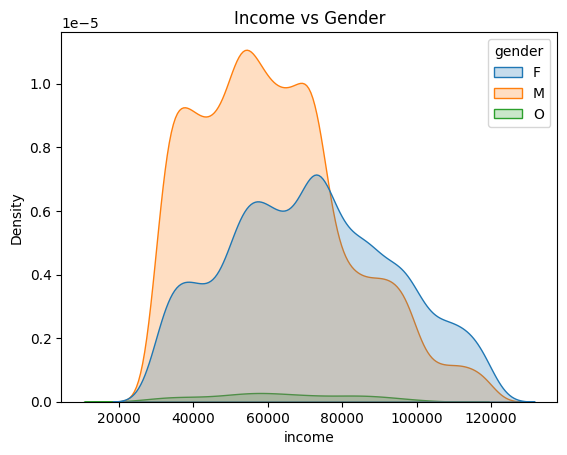

In [20]:
#Bivariate Analysis - income vs gender

customers = df_profile_new.copy()

# Using groupby and mean to calculate income mean by gender
income_mean_by_gender = customers.groupby('gender')['income'].mean().reset_index()
print(income_mean_by_gender)

# Using seaborn's kdeplot for bivariate analysis
sns.kdeplot(data=customers, x='income', hue='gender', fill=True)

# Setting the title
plt.title('Income vs Gender', fontsize=12)

plt.show()


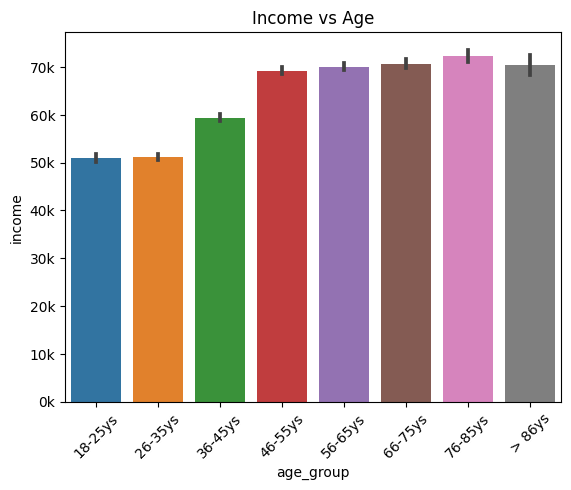

In [21]:
#Bivariate Analysis - income vs age

customers = df_profile_new.copy()

# Create a new column `age_group` using pd.cut if it doesn't exist
if 'age_group' not in customers.columns:
    bins = [customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()]
    labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys']
    customers['age_group'] = pd.cut(customers['age'], bins=bins, labels=labels)

# Using seaborn's barplot for income vs age_group
sns.barplot(x='age_group', y='income', data=customers)

# Rotating x-axis labels
plt.xticks(rotation=45)

# Setting y-axis ticks and labels
ytick_labels = [f'{i}k' for i in range(0, 80, 10)]
plt.yticks(np.arange(0, 80000, 10000), labels=ytick_labels)

# Setting the title
plt.title('Income vs Age', fontsize=12)

plt.show()


#EDA ON OFFERS DATA

In [22]:
offers=df_portfolio.copy()

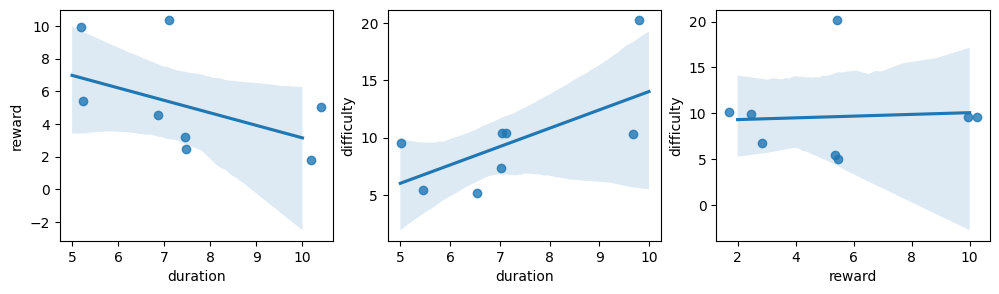

In [23]:
#Bivariate - check the correlation observed in the pairplot

fig, axs = plt.subplots(1,3, figsize = (12,3))
sns.regplot(data = offers[0:8], x = 'duration', y ='reward', x_jitter = 0.5, y_jitter = 0.5, ax = axs[0])
sns.regplot(data = offers[0:8], x = 'duration', y ='difficulty', x_jitter = 0.5, y_jitter = 0.5, ax = axs[1])
sns.regplot(data = offers[0:8], x = 'reward', y ='difficulty', x_jitter = 0.5, y_jitter = 0.5, ax = axs[2])
plt.show()




#EDA ON TRANSCIPTION DATA

In [28]:
transcripts=df_transcript_new.copy()
transcripts['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [29]:
# Creating a dataframe that only contains events about offers
df_event = transcripts[~(transcripts['event'] == 'transaction')]

# Merging df_event with and offers
event_offer = pd.merge(df_event, offers,left_on= 'dict_value', right_on = 'id').drop('id', axis = 1)
# Reordering columns of the merged df
col_names = ['person', 'event', 'offer_Sname', 'reward',
       'channels', 'difficulty', 'duration', 'offer_type', 'time', 'dict_key', 'dict_value',]
event_offer = event_offer[col_names]

#Dropping column dict_value, as it is hard to identify the offer with that value.This information is provided by column offer_Sname
event_offer = event_offer.drop('dict_value', axis = 1)
event_offer.sample(5)



,person,event,offer_Sname,reward,channels,difficulty,duration,offer_type,time,dict_key
25716,528e528df85f418c912cd34d010b97d7,offer received,H,5,"['web', 'email']",20,10,discount,504,offer id
5293,c93d88f92fbb4ccdb743bbd72a6f7a4f,offer completed,A,5,"['web', 'email', 'mobile']",5,7,bogo,330,offer_id
43039,0e1578217ad7455d8cb08509eeee1aee,offer received,G,2,"['web', 'email', 'mobile']",10,7,discount,576,offer id
7314,d998cbbef862404698d1a561dd099c6e,offer viewed,A,5,"['web', 'email', 'mobile']",5,7,bogo,372,offer id
163626,7a153a17d9754d3686c37684146fb681,offer received,J,0,"['email', 'mobile', 'social']",0,3,informational,504,offer id


#Diving deep into promotional offer details

In [30]:

# Find out the number of time being received for each offer 
offer_received = event_offer[event_offer['event'] == 'offer received']
of_r = offer_received.value_counts('offer_Sname').sort_values(ascending = False)

# Find out the number of time being completed for each offer 
offer_completed = event_offer[event_offer['event'] == 'offer completed']
of_c = offer_completed.value_counts('offer_Sname').sort_values(ascending = False)

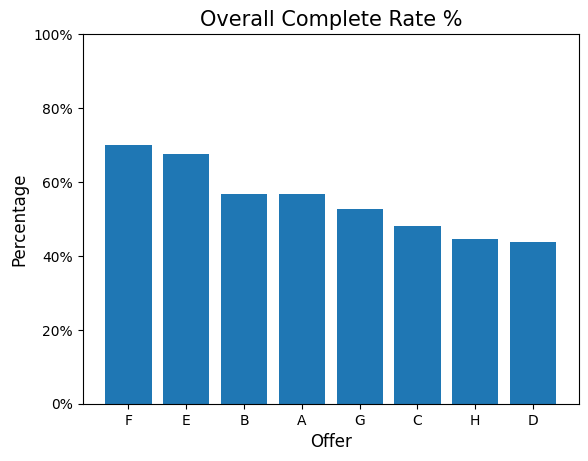

In [31]:
# Overall completion rate of each offer
overall_complete_rate = (of_c.sort_index() / of_r.sort_index()).sort_values(ascending = False)

# Visualize
plt.bar(x = overall_complete_rate.index.values, height = overall_complete_rate.values)
plt.title('Overall Complete Rate %', fontsize = 15)
plt.xlabel('Offer', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

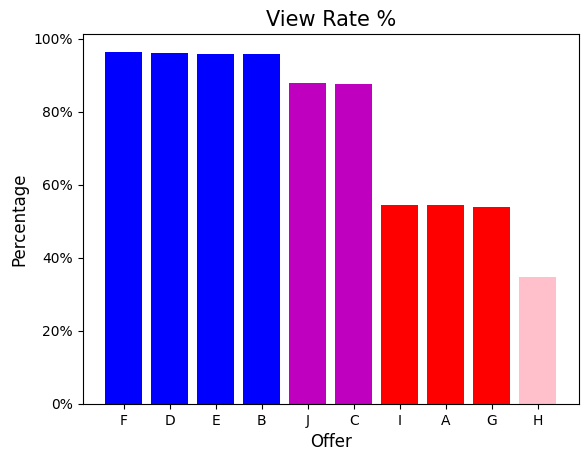

In [36]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
of_v = offer_viewed.value_counts('offer_Sname').sort_values(ascending = False)
of_v_rate = (of_v.sort_index() / of_r.sort_index()).sort_values(ascending = False)
plt.bar(x = np.arange(len(of_v)), height = of_v_rate.values, tick_label = of_v_rate.index.values,
       color = ['blue', 'blue','blue', 'blue','m', 'm','r', 'r', 'r', 'pink'])
plt.title('View Rate %', fontsize = 15)
plt.xlabel('Offer', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

Observations from the above result 
Group 1 - F D E B - email, mobile, social, web
Group 2 - J C - email, mobile, social 
Group 3 - I A G - email, mobile, web 
Group 4 - H - email, web

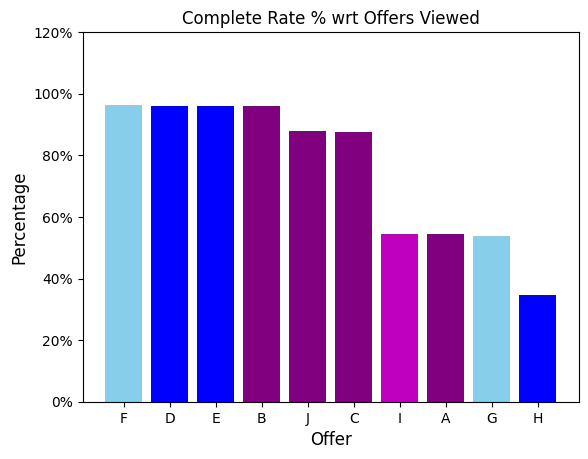

In [39]:

ofc_v = offer_completed.value_counts('offer_Sname').sort_values(ascending = False)

ofc_v_rate = (ofc_v.sort_index() / of_v.sort_index()).sort_values(ascending = False)
color_list = ['skyblue', 'blue', 'blue', 'purple', 'purple', 'purple', 'm', 'purple']
plt.bar(x = of_v_rate.index.values, height = of_v_rate.values, color = color_list)
plt.title('Complete Rate % wrt Offers Viewed', fontsize = 12)
plt.xlabel('Offer', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.yticks(np.arange(0,1.4, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%', '120%'])
plt.show()

#from the above we can say that, For offers that have been viewed, the completion rate ranges from 46% to 128%.Offers H and A both achived a completion rate of over 100%! This means on average they were completed by customers more than once. For offers with 5 top completion rate, all are of type 'discount', with Offer A being the only exception. This reveals that customers preferred 'dicount' type to 'bogo'

# CUSTOMER SEGMENTATION

In [47]:
# Create an empty df with columns needed
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])
# Remove rows of customers with missing gender and income

In [48]:
# Remove rows of customers with missing gender and income
id_to_remove = missing_income['id']
transcripts_filtered = transcripts[~transcripts['person'].isin(id_to_remove)].reset_index(drop = True)

# Add data to `person`, ordered in ascending order
customer_behavior['person'] = transcripts_filtered.value_counts('person').sort_index().index.values


In [49]:
# Aggregate df transcripts
transcripts_filtered = transcripts_filtered.sort_values('person')
transcripts_grouped = transcripts_filtered.groupby(['person', 'event']).count()
transcripts_grouped.head()

dict_key  dict_value  time
person                           event                                      
0009655768c64bdeb2e877511632db8f offer completed         3           3     3
                                 offer received          5           5     5
                                 offer viewed            4           4     4
                                 transaction             8           8     8
0011e0d4e6b944f998e987f904e8c1e5 offer completed         3           3     3

In [50]:
# Set `person` as index for easy slicing
customer_behavior.set_index('person', inplace = True)

# Add data to `num_received`, `num_viewed`, `num_completed` and `num_transactions`
for person_id in customer_behavior.index.values:
    if (person_id, 'offer received') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_received'] = transcripts_grouped.loc[(person_id, 'offer received'), 'dict_key']
    if (person_id, 'offer viewed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_viewed'] = transcripts_grouped.loc[(person_id, 'offer viewed'), 'dict_key']
    if (person_id, 'offer completed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_completed'] = transcripts_grouped.loc[(person_id, 'offer completed'), 'dict_key']
    if (person_id, 'transaction') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_transactions'] = transcripts_grouped.loc[(person_id, 'transaction'), 'dict_key']

In [51]:
# Calculate how much money each customer spent during the month of the campaign
money_spent = transcripts_filtered[transcripts_filtered['event'] == 'transaction'].groupby('person').agg({'dict_value': 'sum'})

# Add to `money_spent`
customer_behavior['money_spent'] = money_spent
customer_behavior.head(5)

,num_received,num_viewed,num_completed,num_transactions,money_spent
person,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,8,127.6
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,5,3,3,8,196.86
0020ccbbb6d84e358d3414a3ff76cffd,4,4,3,12,154.05
003d66b6608740288d6cc97a6903f4f0,5,4,3,18,48.34


In [52]:
customer_behavior.isna().sum()

num_received           5
num_viewed           150
num_completed       2839
num_transactions     333
money_spent          333
dtype: int64

In [53]:
# Replace NA with 0
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

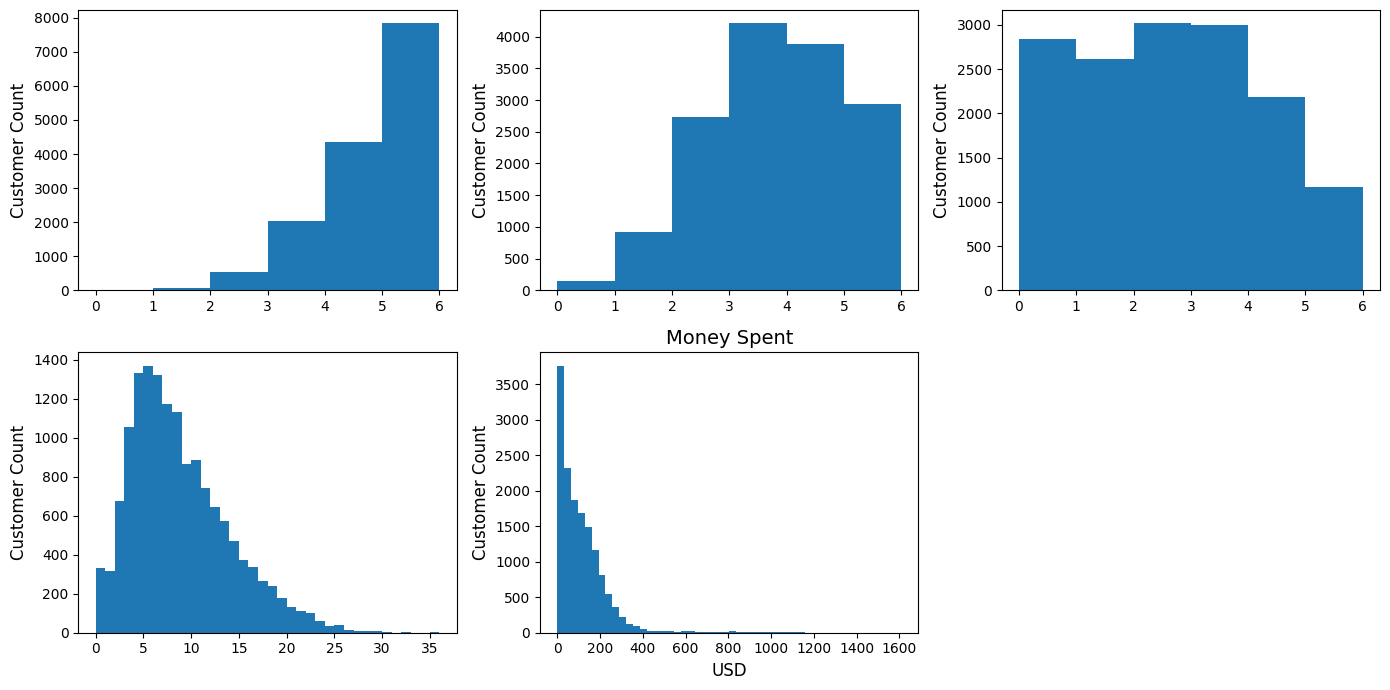

In [54]:
# Check the features with plots
fig, axs = plt.subplots(2,3, figsize = (14, 7))
fig_titles = ['Number of Offers Received', 'Number of Offers Viewed', 'Number of Offers Completed', 'Number of Transactions Made', 'Money Spent']
x_labels = ['Offers', 'Offers','Offers','Transactions','USD']
y_labels = 'Customer Count'

sub_row, sub_col = 0, 0

for i in range(5):
    if i < 3:
        sub_row = 0
        sub_col = i
        bins = customer_behavior.iloc[:, i].max()
        axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
        axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)

    else:
        sub_row = 1
        sub_col = i - 3
        if i == 3:
            bins = customer_behavior.iloc[:, i].max()
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
        else:
            bins = 50
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
    
            axs[sub_row, sub_col].set_title(fig_titles[i], fontsize = 14)
            axs[sub_row, sub_col].set_xlabel(x_labels[i], fontsize = 12)
            
axs[1,2].set_axis_off()
plt.tight_layout()
plt.show()


In [55]:
# Keep a copy of the df with `num_received`
customer_behavior_with_num_received = customer_behavior.copy()

# Drop `num_received`
customer_behavior.drop('num_received', axis = 1, inplace = True)
customer_behavior.head(3)

,num_viewed,num_completed,num_transactions,money_spent
person,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86


In [56]:
customer_behavior['money_spent'].describe()

count    14825.000000
mean       117.028155
std        129.965016
min          0.000000
25%         31.450000
50%         87.040000
75%        160.900000
max       1608.690000
Name: money_spent, dtype: float64

In [57]:
# Remove rows with top 2% in `money_spent`
q = customer_behavior['money_spent'].quantile(0.98)
rows_top_money_spent = customer_behavior[customer_behavior['money_spent'] >= q]

person_top_money_spent = rows_top_money_spent.index.values
customer_top_money_spent_removed = customer_behavior[customer_behavior['money_spent'] < q]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


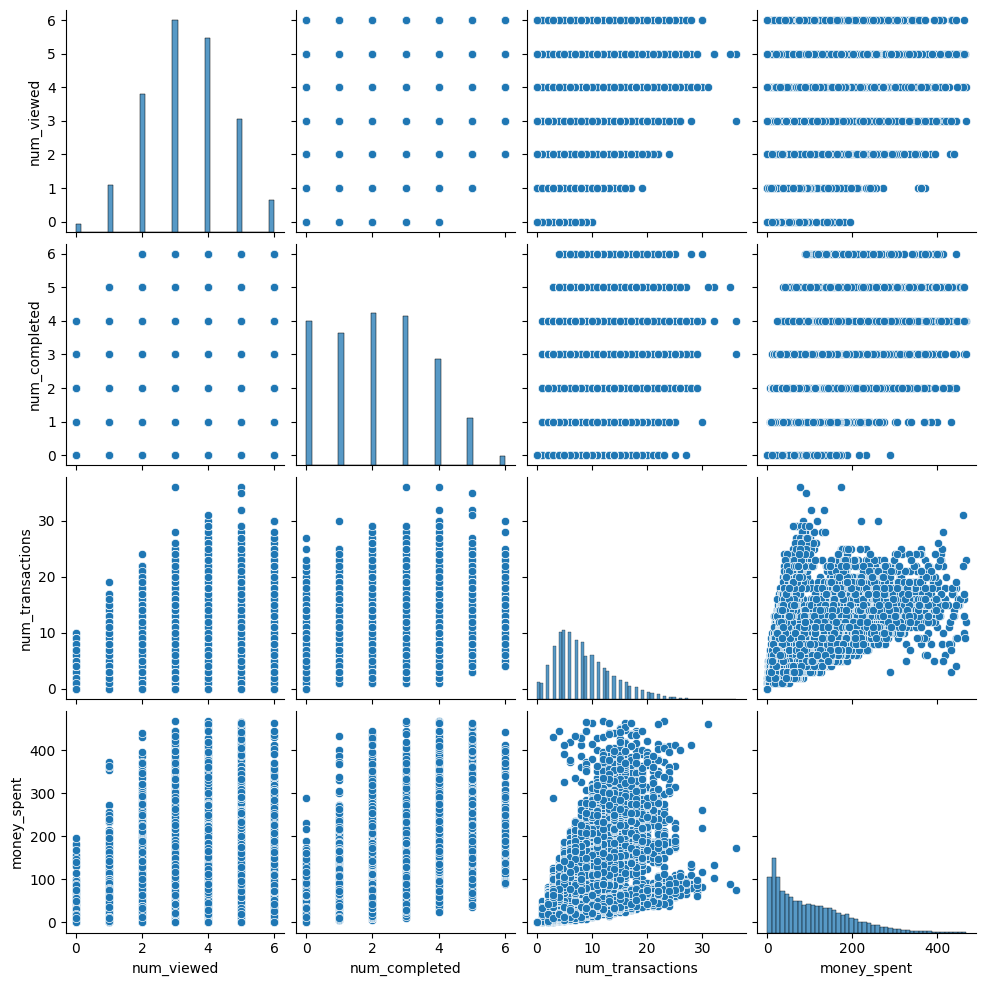

In [58]:
customer_behavior_filtered = customer_top_money_spent_removed.copy()
sns.pairplot(customer_behavior_filtered); plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#K MEANS Clustering


In [60]:

scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customer_behavior_filtered)
customer_behavior_scaled = scaler_customer_behavior.transform(customer_behavior_filtered)
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior_filtered.columns.values).head(3)

,num_viewed,num_completed,num_transactions,money_spent
0,0.501233,0.531352,-0.060069,0.277234
1,1.276977,0.531352,-0.639666,-0.281415
2,-0.274511,0.531352,-0.060069,1.080974


C:\Users\chemu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chemu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chemu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chemu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

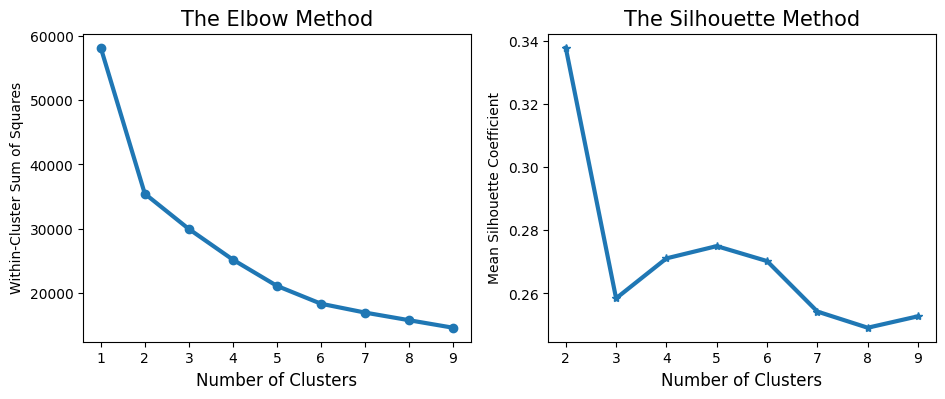

In [61]:
df_feature = customer_behavior_scaled
wcss = []
sil_score = []
max_clusters = 10

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(df_feature)
    # calculate wcss for the Elbow Method
    wcss.append(kmeans.inertia_)
    
    # calculate the mean Silhouette coefficient
    if k >= 2:
        labels = kmeans.labels_
        sil_score.append(metrics.silhouette_score(df_feature, labels))

        # Plot
fig, axs = plt.subplots(1,2, figsize = (11,4))
axs[0].plot(np.arange(1, max_clusters), wcss, marker = 'o', lw = 3)
axs[0].set_xlabel('Number of Clusters', fontsize = 12)
axs[0].set_ylabel('Within-Cluster Sum of Squares')
axs[0].set_title('The Elbow Method', fontsize = 15)

axs[1].plot(np.arange(2, max_clusters), sil_score, marker = '*' , lw = 3)
axs[1].set_xlabel('Number of Clusters', fontsize = 12)
axs[1].set_ylabel('Mean Silhouette Coefficient')
axs[1].set_title('The Silhouette Method', fontsize = 15)
plt.show()

C:\Users\chemu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    4018
1    2901
2    2649
3    1584
4    3376
dtype: int64

 ************************************************************
Silhouette Score: 0.274991463208214

 ************************************************************
        num_viewed num_completed num_transactions money_spent
              mean          mean             mean        mean
cluster                                                      
0              2.1           0.7              5.0        34.6
1              4.5           4.1             12.2       223.0
2              4.5           1.5              4.5        50.3
3              3.5           2.0             17.1        72.2
4              2.8           2.9              7.7       140.2


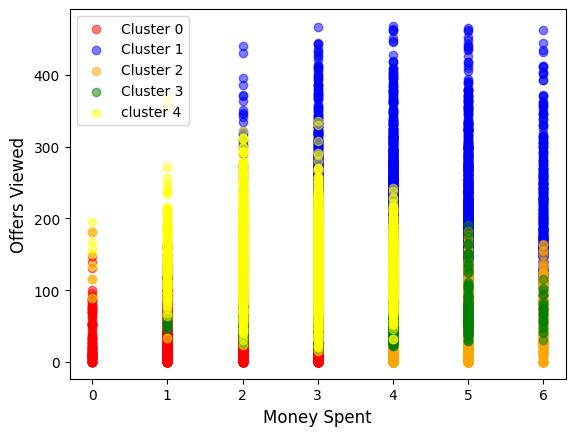

In [62]:
#K MEANS CLUSTERING

k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters = k, random_state = 10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior_filtered.assign(cluster = kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)
print('Silhouette Score:', metrics.silhouette_score(df_feature, labels = kmeans.labels_))

#
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
print(cluster_info.round(1))

# Plot
color_list = ['red', 'blue', 'orange', 'green', 'yellow']
legend_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'num_viewed'],
               customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'money_spent'],
               c = color_list[i], label = legend_list[i], alpha = 0.5)
plt.ylabel('Offers Viewed', fontsize = 12)
plt.xlabel('Money Spent', fontsize = 12)
plt.legend(legend_list)
plt.show()

In [63]:
# Split data for train and test
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [64]:
# Multiclass logistic regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Check test accurracy
y_predict = clf.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.993805918788713


In [65]:
#classification with KNN

# K-Nearest Neighbors Classificaiton
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

# Check test accuracy
y_predict = knn.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.9855471438403304


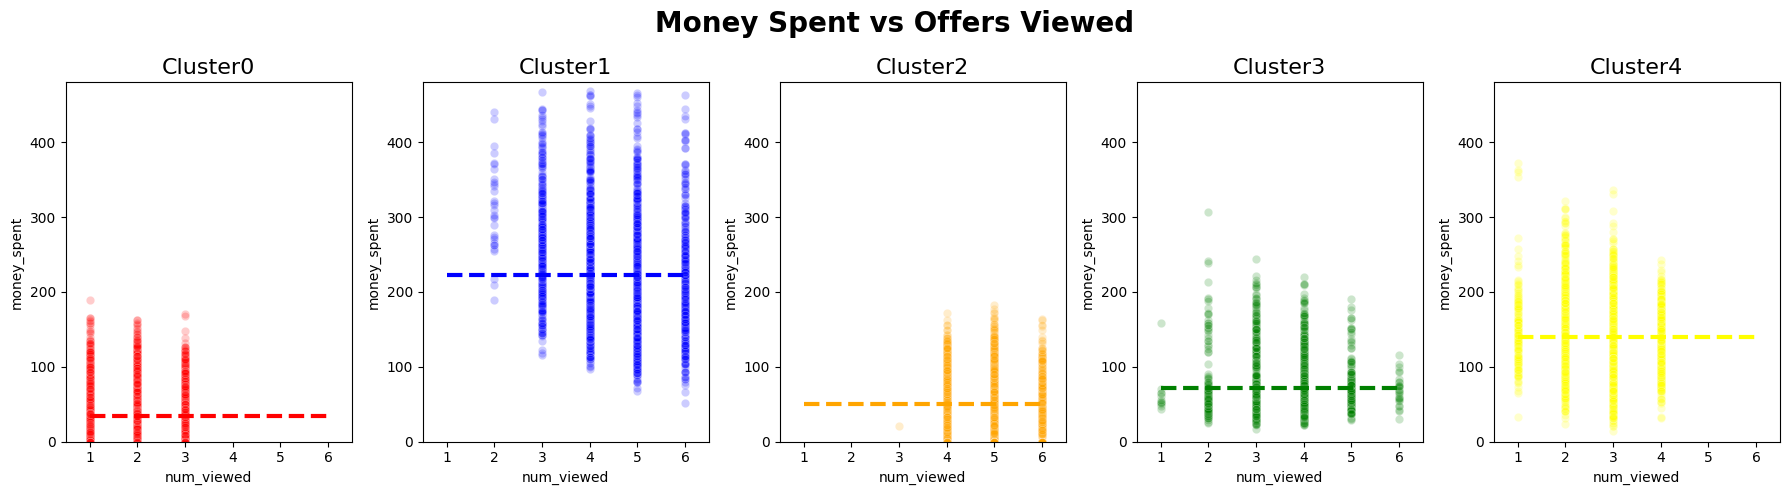

In [66]:
#4.3 Clustering Result Visualization & Interpretation

fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'money_spent', alpha = 0.2, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'money_spent': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0,480))
    fig.suptitle('Money Spent vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

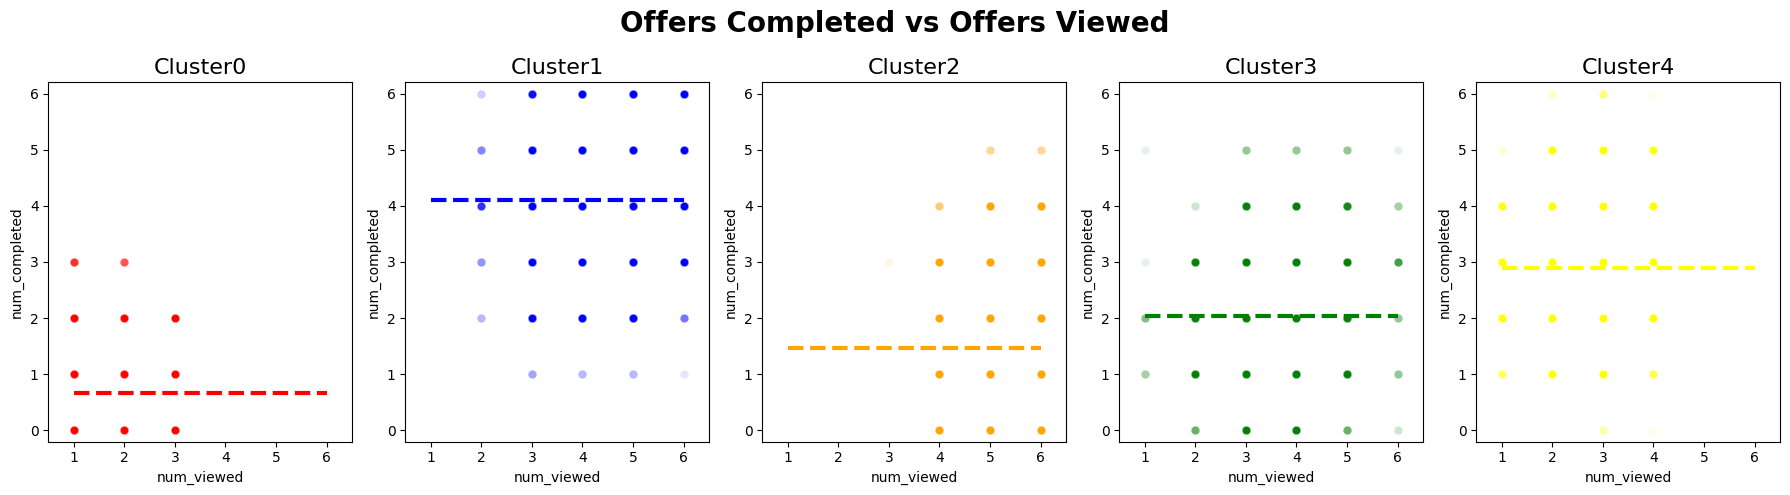

In [67]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_completed', alpha = 0.1, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_completed': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((-0.2,6.2))
    fig.suptitle('Offers Completed vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

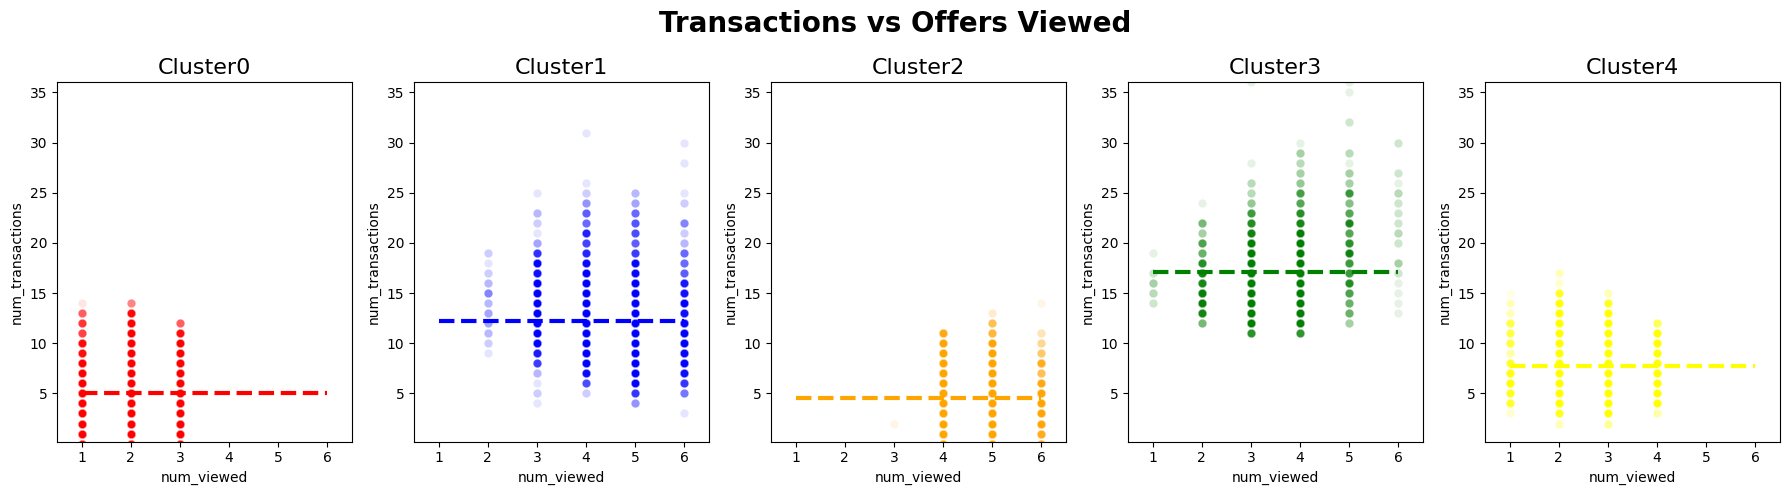

In [68]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_transactions', alpha = 0.1, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_transactions': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0.2,36))
fig.suptitle('Transactions vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [71]:
cluster_mean = customer_with_cluster.groupby('cluster').mean()
population_mean = customer_with_cluster.mean()
relative_importance = (cluster_mean / population_mean[0 :-1]) - 1

# Sort clusters by overall (summation) performance
importance_ranking = relative_importance.sum(axis = 1).sort_values(ascending = False).index.values


# Calculated the mean of all features for each cluster
temp = pd.merge(customer_with_cluster, customer_behavior_with_num_received['num_received'], left_index = True, right_index = True)
cluster_means = temp.groupby('cluster').mean().round(3)
cluster_means = cluster_means.reindex(importance_ranking)
cluster_means


,num_viewed,num_completed,num_transactions,money_spent,num_received
cluster,,,,,
1,4.452,4.096,12.223,222.970,5.094
3,3.512,2.028,17.098,72.242,4.674
4,2.845,2.887,7.744,140.156,4.150
2,4.541,1.463,4.529,50.347,5.029
0,2.143,0.671,4.992,34.568,3.881


In [72]:
# Create the df for summarizing by clusters
cluster_summary = pd.DataFrame(columns = ['cluster', 'frequency', 'avg_purchase_value', 'offer_complete_rate', 'offer_sensitivity'])
cluster_summary['cluster'] = index = np.arange(k)
cluster_summary.set_index('cluster', drop = True, inplace = True)

In [73]:
# Add values to df `cluster_summary`
cluster_summary['frequency'] = cluster_means['num_transactions'].round(1)
cluster_summary['avg_purchase_value'] = (cluster_means['money_spent'] / cluster_means['num_transactions']).round(1)
cluster_summary['offer_complete_rate'] = (cluster_means['num_completed'] / cluster_means['num_received']).round(2)
cluster_summary['offer_sensitivity'] = (cluster_means['num_completed'] / cluster_means['num_transactions']).round(2)

In [74]:
# Redorder index
cluster_summary = cluster_summary.reindex(importance_ranking)
cluster_summary

,frequency,avg_purchase_value,offer_complete_rate,offer_sensitivity
cluster,,,,
1,12.2,18.2,0.80,0.34
3,17.1,4.2,0.43,0.12
4,7.7,18.1,0.70,0.37
2,4.5,11.1,0.29,0.32
0,5.0,6.9,0.17,0.13


In [75]:
rows_top_money_spent_scaled = scaler_customer_behavior.transform(rows_top_money_spent)

# Have a direct look at the clustering result
kmeans.predict(rows_top_money_spent_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [76]:
cluster_kmeans = kmeans.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_kmeans, return_counts = True)

print('According to the KMeans model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i])) 

According to the KMeans model, customers spending top 2% belong to:
295 customers belongs to Cluster 1.
2 customers belongs to Cluster 4.


In [77]:
cluster_logistic = clf.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_logistic, return_counts = True)

print('According to the Logistic Regression model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i])) 

According to the Logistic Regression model, customers spending top 2% belong to:
293 customers belongs to Cluster 1.
4 customers belongs to Cluster 4.


In [78]:
cluster_KNN = knn.predict(rows_top_money_spent_scaled)
unique_element, counter = np.unique(cluster_KNN, return_counts = True)

print('According to the KNN model, customers spending top 2% belong to:')
for i in range(len(unique_element)):
    print('{} customers belongs to Cluster {}.'.format(counter[i], unique_element[i])) 

According to the KNN model, customers spending top 2% belong to:
297 customers belongs to Cluster 1.


In [79]:
#Add top 2% spenders to cluster 1 (Most Valuable Customers)
# Concatenate top 2% spenders with the rest of the customers (behavior)
customer_behavior_clustered = temp[rows_top_money_spent.columns.values]
customer_behavior_clustered = customer_behavior_clustered.assign(cluster = temp['cluster'])
customer_behavior_clustered = pd.concat([customer_behavior_clustered, rows_top_money_spent], axis = 0)

# Assign these customers to cluster 1
customer_behavior_clustered.fillna(value = 1, inplace = True)

# Convert cluster label from float to integers
customer_behavior_clustered['cluster'] = customer_behavior_clustered['cluster'].astype('int')

In [80]:
# Reset index for `customer_behavior_clustered`
customer_behavior_clustered.reset_index(inplace = True)
# Merge
customer_behavior_profile = pd.merge(customer_behavior_clustered, customers,
                                    left_on = 'person', right_on = 'id').drop(['id'], axis = 1)


In [81]:
# Add column `cluster_alias`
customer_behavior_profile['cluster_alias'] = customer_behavior_profile['cluster'].map({1: 'Most-Valables',
                                                                                       3: 'Regulars',
                                                                                       4: 'High-Potentials',
                                                                                       2: 'Offer-Viewers',
                                                                                       0: 'Low-Engagers'})
customer_behavior_profile.head(3)


,person,num_viewed,num_completed,num_transactions,money_spent,cluster,gender,age,became_member_on,income,age_group,cluster_alias
0,0009655768c64bdeb2e877511632db8f,4,3,8,127.60,4,M,33,20170421,72000.0,26-35ys,High-Potentials
1,0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46,2,O,40,20180109,57000.0,36-45ys,Offer-Viewers
2,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,4,F,59,20160304,90000.0,56-65ys,High-Potentials


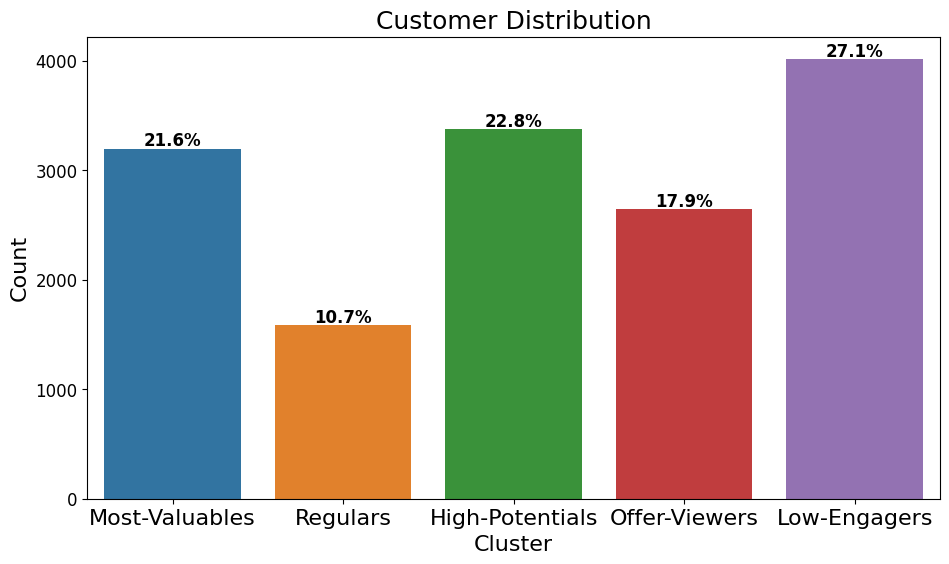

In [82]:
#Customer demographics of each segment
#Number of customers in each segment
p = customer_behavior_profile.value_counts('cluster').reindex(importance_ranking)
cluster_pct = list((p/p.sum() * 100).round(2))
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
fig = plt.figure(figsize = (11,6))
ax = sns.barplot(x = p.index.values, y = p.values, order = importance_ranking)
patches = ax.patches
for i in range(len(p)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 25
    ax.annotate(text = '{:.1f}%'.format(cluster_pct[i]), xy = (x, y), ha = 'center',
               fontsize = 12, weight = 'bold')
    
plt.title('Customer Distribution', fontsize = 18)
plt.xticks(ticks = np.arange(len(p)), labels = cluster_names, fontsize = 16)
plt.yticks(ticks = np.arange(0, 5000, 1000), fontsize = 12)
plt.xlabel('Cluster', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

In [83]:
segment_means = customer_behavior_profile.groupby('cluster').agg({'age': 'mean', 'income': 'mean'}).reindex(importance_ranking)
segment_means.index = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Offer-Viewers', 'Low-Engagers']
segment_means.round(2).head()

,age,income
Most-Valuables,56.10,71735.46
Regulars,47.33,48782.83
High-Potentials,57.93,74534.66
Offer-Viewers,55.53,65218.95
Low-Engagers,52.10,59371.08
